<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week11/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247573,153622.0,-1.267030,2.061655,-1.792035,-0.310189,0.102262,-1.118710,-0.024350,1.008006,-0.351529,...,0.384248,0.851287,-0.168688,-0.803802,-0.292331,-0.115587,-0.171071,0.096760,2.26,0.0
247574,153622.0,-0.283558,-0.416036,1.790647,-2.442271,-0.223471,1.137116,-0.548315,0.339010,0.343727,...,0.070618,0.659954,-0.402548,-1.433635,-0.180144,-0.244064,0.260955,-0.030074,1.00,0.0
247575,153622.0,0.162601,-0.866877,-0.347900,-1.022486,0.354679,-0.220055,-0.177287,-0.613201,-2.430853,...,0.130771,1.294386,0.349734,0.161683,-0.942447,0.304386,-0.094054,0.127112,10.00,0.0
247576,153622.0,2.085175,0.393051,-4.508201,-0.311771,3.510117,2.453299,0.220469,0.543377,-0.100434,...,-0.067217,-0.072642,-0.036584,0.529693,0.414685,0.735870,-0.058233,-0.026658,0.76,0.0


In [5]:
df.shape

(247578, 31)

In [6]:
df.isnull().values.any()

np.True_

In [7]:
LABELS = ["Normal", "Fraud"]

/tmp/ipython-input-2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


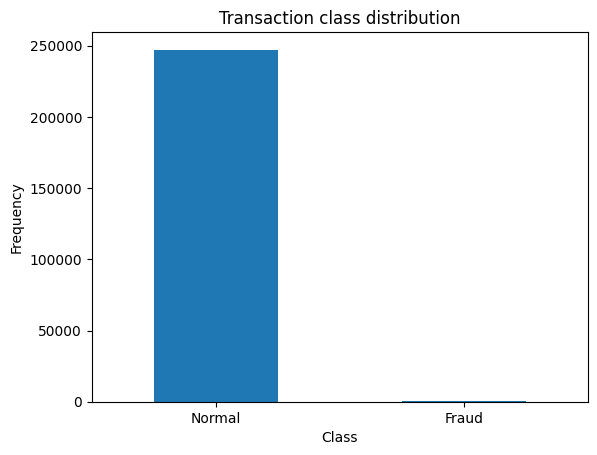

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [9]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(449, 31)

In [10]:
normal.shape

(247128, 31)

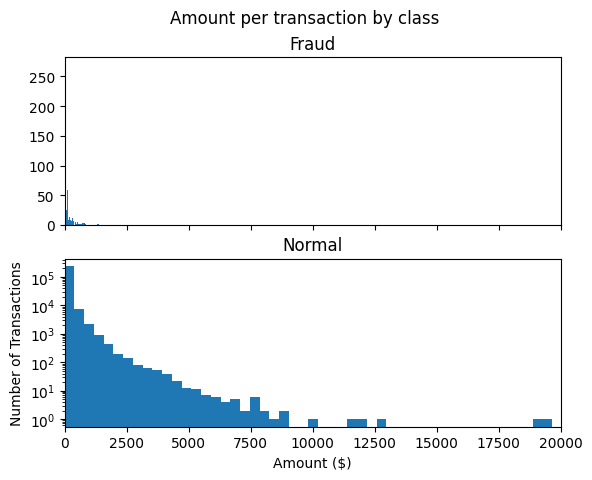

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

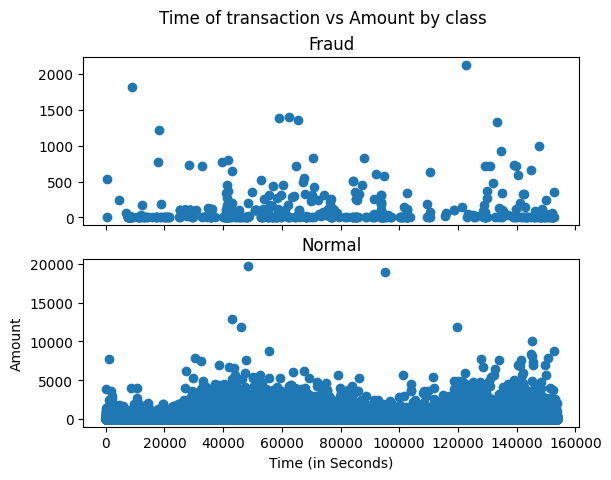

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [14]:
RANDOM_SEED = 42

In [15]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(197697, 29)

In [17]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [18]:
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1108 - val_loss: 0.9175
Epoch 2/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8987 - val_loss: 0.8959
Epoch 3/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8863 - val_loss: 0.8810
Epoch 4/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.8654 - val_loss: 0.8733
Epoch 5/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.8505 - val_loss: 0.8689
Epoch 6/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8543 - val_loss: 0.8655
Epoch 7/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8537 - val_loss: 0.8624
Epoch 8/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8417 - val_loss: 0.8593
Epoch 9/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8647 - val_loss: 0.8554
Epoch 10/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8446 - val_loss: 0.8522
Epoch 11/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8364 - val_loss: 0.8495
Epoch 12/50
696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

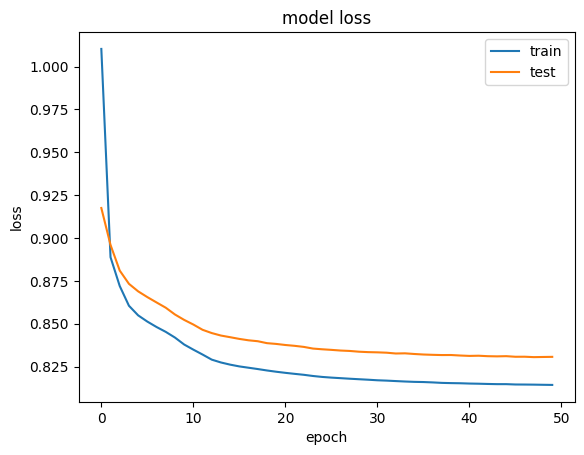

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [20]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1548/1548 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


,reconstruction_error,true_class
count,49515.000000,49515.000000
mean,0.860209,0.001696
std,3.752617,0.041154
min,0.045801,0.000000
25%,0.252317,0.000000
50%,0.444309,0.000000
75%,0.707407,0.000000
max,227.166337,1.000000


In [21]:
error_df.head()

,reconstruction_error,true_class
25988,0.077127,0.0
49216,0.819976,0.0
220002,1.062755,0.0
232545,0.472342,0.0
80007,0.115843,0.0


In [29]:
threshold = 18

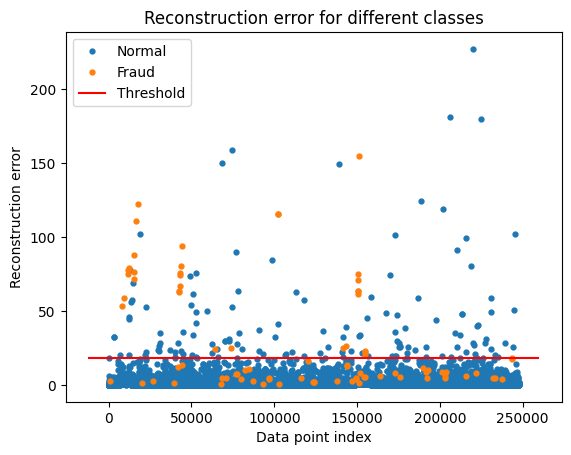

In [30]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();